<a href="https://colab.research.google.com/github/paulLieber98/ucla-doordash-proj/blob/main/ucla_doordash_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('historical_data.csv') #https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [ ]:
# potential target columns

#actual_delivery time, total_outstanding_orders, estimated_order_place_duration, subtotal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [3]:
# dropping columns

df1 = df.drop(['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category'], axis = 1)
df1

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2956,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,2956,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,2956,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,3630,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [ ]:
#predicting price 'subtotal'

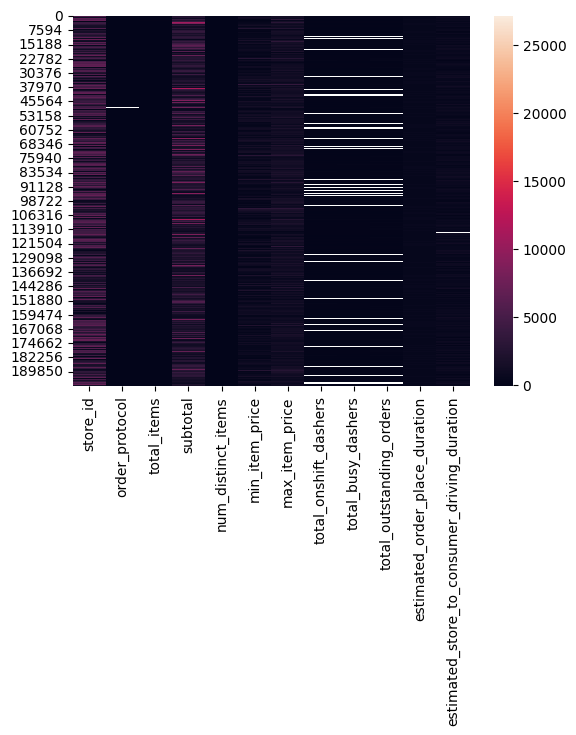

In [ ]:
sns.heatmap(df1)
plt.show()

In [ ]:
df1.corr()

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
store_id,1.000000,0.019554,-0.008796,-0.013370,-0.012727,-0.009128,-0.018661,-0.023141,-0.023245,-0.020348,0.017469,0.001953
order_protocol,0.019554,1.000000,0.008790,-0.053623,-0.023342,-0.045421,-0.090960,0.145022,0.149584,0.134895,-0.678222,-0.008326
total_items,-0.008796,0.008790,1.000000,0.558067,0.763912,-0.393149,-0.058233,0.031732,0.028602,0.034380,-0.023643,0.004692
subtotal,-0.013370,-0.053623,0.558067,1.000000,0.681101,0.037038,0.505547,0.130831,0.125566,0.130106,0.039043,0.034665
num_distinct_items,-0.012727,-0.023342,0.763912,0.681101,1.000000,-0.448739,0.041871,0.065943,0.060638,0.067800,0.003507,0.022693
min_item_price,-0.009128,-0.045421,-0.393149,0.037038,-0.448739,1.000000,0.545484,0.042368,0.043881,0.041002,0.053073,0.003373
max_item_price,-0.018661,-0.090960,-0.058233,0.505547,0.041871,0.545484,1.000000,0.133113,0.131005,0.130676,0.085287,0.026591
total_onshift_dashers,-0.023141,0.145022,0.031732,0.130831,0.065943,0.042368,0.133113,1.000000,0.943789,0.936122,-0.185650,0.045925
total_busy_dashers,-0.023245,0.149584,0.028602,0.125566,0.060638,0.043881,0.131005,0.943789,1.000000,0.932913,-0.191811,0.044504
total_outstanding_orders,-0.020348,0.134895,0.034380,0.130106,0.067800,0.041002,0.130676,0.936122,0.932913,1.000000,-0.172442,0.039795


In [ ]:
#good features for subtotal:

# total_items, num_distinct_items, max_item_price

In [ ]:
df1

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2956,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,2956,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,2956,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,3630,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


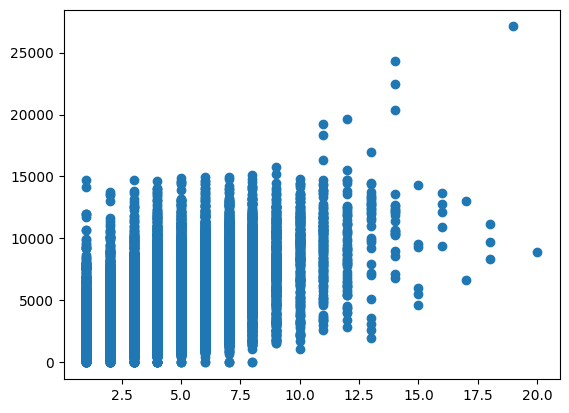

In [5]:
x = df1['num_distinct_items']
y = df1['subtotal']


plt.scatter(x, y)
plt.show()

In [8]:
df1.isnull().sum()

,0
store_id,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_dashers,0
total_busy_dashers,0
total_outstanding_orders,0


In [ ]:
df1.median()

,0
store_id,3592.0
order_protocol,3.0
total_items,3.0
subtotal,2200.0
num_distinct_items,2.0
min_item_price,595.0
max_item_price,1095.0
total_onshift_dashers,37.0
total_busy_dashers,34.0
total_outstanding_orders,41.0


In [8]:
df1 = df1.fillna(df.median(numeric_only=True)) # RUN

In [9]:
y = df1['subtotal']
X = df1.drop('subtotal', axis = 1)

In [10]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
#trying out linear reg

lr_model = LinearRegression()

#training model
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

#eval
print(f'r squared: {r2_score(y_test, y_pred)}')
print(f'mse: {mean_squared_error(y_test, y_pred)}')

r squared: 0.728175660363142
mse: 914795.2832716133


In [13]:
#deleting negative correlation columns for better r2

In [14]:
df1.corr()

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
store_id,1.000000,0.019527,-0.008796,-0.013370,-0.012727,-0.009128,-0.018661,-0.020606,-0.020598,-0.017217,0.017469,0.001950
order_protocol,0.019527,1.000000,0.008766,-0.053501,-0.023292,-0.045312,-0.090714,0.141249,0.145716,0.132077,-0.676586,-0.008298
total_items,-0.008796,0.008766,1.000000,0.558067,0.763912,-0.393149,-0.058233,0.031388,0.028444,0.034274,-0.023643,0.004688
subtotal,-0.013370,-0.053501,0.558067,1.000000,0.681101,0.037038,0.505547,0.127410,0.122449,0.127264,0.039043,0.034615
num_distinct_items,-0.012727,-0.023292,0.763912,0.681101,1.000000,-0.448739,0.041871,0.063834,0.058814,0.065854,0.003507,0.022666
min_item_price,-0.009128,-0.045312,-0.393149,0.037038,-0.448739,1.000000,0.545484,0.039872,0.041268,0.038238,0.053073,0.003368
max_item_price,-0.018661,-0.090714,-0.058233,0.505547,0.041871,0.545484,1.000000,0.128475,0.126441,0.126048,0.085287,0.026561
total_onshift_dashers,-0.020606,0.141249,0.031388,0.127410,0.063834,0.039872,0.128475,1.000000,0.944032,0.936142,-0.177134,0.044301
total_busy_dashers,-0.020598,0.145716,0.028444,0.122449,0.058814,0.041268,0.126441,0.944032,1.000000,0.933080,-0.182939,0.042975
total_outstanding_orders,-0.017217,0.132077,0.034274,0.127264,0.065854,0.038238,0.126048,0.936142,0.933080,1.000000,-0.163813,0.038637


In [15]:
#negative ones: store_id, order_protocol

In [17]:
df2 = df1.drop(['store_id', 'order_protocol'], axis = 1)
df2

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [18]:
y_no_neg = df2['subtotal']
X_no_neg = df2.drop('subtotal', axis = 1)

In [19]:
#splitting data

X_train_no_neg, X_test_no_neg, y_train_no_neg, y_test_no_neg = train_test_split(X_no_neg, y_no_neg, test_size = 0.2, random_state = 42)

In [22]:
#trying out linear reg

lr_model_no_neg = LinearRegression()

#training model
lr_model_no_neg.fit(X_train_no_neg, y_train_no_neg)

y_pred_no_neg = lr_model_no_neg.predict(X_test_no_neg)

#eval
print(f'r squared: {r2_score(y_test_no_neg, y_pred_no_neg)}')
print(f'mse: {mean_squared_error(y_test_no_neg, y_pred_no_neg)}')


r squared: 0.7281479614314625
mse: 914888.5010168888


In [26]:
#@title im sick of these bad results. im going to put back the string-based-values but hot-one-encode them from original df

In [39]:
df.dtypes == 'object' #all Trues are string columns

,0
market_id,False
created_at,True
actual_delivery_time,True
store_id,False
store_primary_category,True
order_protocol,False
total_items,False
subtotal,False
num_distinct_items,False
min_item_price,False


In [8]:
#only doing this for 'store_primary_category' bc its the only logical thing that could contribute to the result.

#first off, dropping the unnecessary columns
df_new = df.drop(['market_id', 'created_at', 'actual_delivery_time'], axis = 1)
df_new

,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1845.0,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0
1,5477.0,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0
2,5477.0,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0
3,5477.0,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0
4,5477.0,NaN,1.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105716,3305.0,alcohol,5.0,9.0,8600.0,7.0,200.0,2700.0,129.0,92.0,137.0,251.0,752.0
105717,3305.0,alcohol,5.0,3.0,3300.0,3.0,200.0,1900.0,49.0,36.0,35.0,251.0,532.0
105718,3305.0,alcohol,5.0,1.0,1900.0,1.0,1500.0,1500.0,103.0,108.0,178.0,251.0,224.0
105719,3305.0,alcohol,5.0,2.0,6900.0,2.0,1500.0,2700.0,29.0,32.0,35.0,251.0,870.0


In [12]:
# now going to remove the na rows on 'store primary category'

df_new1 = df_new.dropna(subset=['store_primary_category'])
df_new1

,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1845.0,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0
1,5477.0,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0
8,5477.0,indian,3.0,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0
14,2841.0,italian,1.0,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,446.0,795.0
15,2841.0,italian,1.0,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,446.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105715,3305.0,alcohol,5.0,2.0,3400.0,1.0,1500.0,1500.0,121.0,112.0,167.0,251.0,486.0
105716,3305.0,alcohol,5.0,9.0,8600.0,7.0,200.0,2700.0,129.0,92.0,137.0,251.0,752.0
105717,3305.0,alcohol,5.0,3.0,3300.0,3.0,200.0,1900.0,49.0,36.0,35.0,251.0,532.0
105718,3305.0,alcohol,5.0,1.0,1900.0,1.0,1500.0,1500.0,103.0,108.0,178.0,251.0,224.0


In [21]:
df_new2 = pd.get_dummies(df_new1['store_primary_category'])
df_new2

,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105715,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105716,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105717,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105718,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
pd.get_dummies(df_new1['store_primary_category'])

,afghan,african,alcohol,american,argentine,asian,barbecue,belgian,brazilian,breakfast,...,southern,spanish,steak,sushi,tapas,thai,turkish,vegan,vegetarian,vietnamese
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105715,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105716,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105717,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105718,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df_new2.columns

Index(['store_primary_category_afghan', 'store_primary_category_african',
       'store_primary_category_alcohol', 'store_primary_category_american',
       'store_primary_category_argentine', 'store_primary_category_asian',
       'store_primary_category_barbecue', 'store_primary_category_belgian',
       'store_primary_category_brazilian', 'store_primary_category_breakfast',
       'store_primary_category_british', 'store_primary_category_bubble-tea',
       'store_primary_category_burger', 'store_primary_category_burmese',
       'store_primary_category_cafe', 'store_primary_category_cajun',
       'store_primary_category_caribbean', 'store_primary_category_catering',
       'store_primary_category_cheese', 'store_primary_category_chinese',
       'store_primary_category_chocolate',
       'store_primary_category_comfort-food',
       'store_primary_category_convenience-store',
       'store_primary_category_dessert', 'store_primary_category_dim-sum',
       'store_primary_category_

In [23]:
y = df_new2['subtotal']
X = df_new2.drop('subtotal', axis = 1)

KeyError: 'subtotal'

In [25]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
lr_model = LinearRegression()

#training model
lr_model.fit(X_train, y_train)

#prediction
y_pred = lr_model.predict(X_test)

#eval
print(f'r squared: {r2_score(y_test, y_pred)}')
print(f'mse: {mean_squared_error(y_test, y_pred)}')

ValueError: could not convert string to float: 'convenience-store'

In [27]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103301 entries, 0 to 105719
Data columns (total 72 columns):
 #   Column                                    Non-Null Count   Dtype
---  ------                                    --------------   -----
 0   store_primary_category_afghan             103301 non-null  bool 
 1   store_primary_category_african            103301 non-null  bool 
 2   store_primary_category_alcohol            103301 non-null  bool 
 3   store_primary_category_american           103301 non-null  bool 
 4   store_primary_category_argentine          103301 non-null  bool 
 5   store_primary_category_asian              103301 non-null  bool 
 6   store_primary_category_barbecue           103301 non-null  bool 
 7   store_primary_category_belgian            103301 non-null  bool 
 8   store_primary_category_brazilian          103301 non-null  bool 
 9   store_primary_category_breakfast          103301 non-null  bool 
 10  store_primary_category_british            103301 

In [31]:
#@title ok moving on from linear regressinon mess sorry

In [32]:
#trying RANDOM FOREST

In [16]:
y = df1['subtotal']
X = df1.drop(['subtotal'], axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'r squared: {r2_score(y_test, y_pred)}')
print(f'mse: {mean_squared_error(y_test, y_pred)}')

r squared: 0.9117038841994555
mse: 297150.9849833546


In [24]:
#dropping more columns

df_alex = df1.drop(['order_protocol', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration'], axis = 1)
df_alex

,store_id,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,estimated_order_place_duration
0,1845,4,3441,4,557,1239,33.0,446
1,5477,1,1900,1,1400,1400,1.0,446
2,5477,1,1900,1,1900,1900,1.0,446
3,5477,6,6900,5,600,1800,1.0,446
4,5477,3,3900,3,1100,1600,6.0,446
...,...,...,...,...,...,...,...,...
197423,2956,3,1389,3,345,649,17.0,251
197424,2956,6,3010,4,405,825,12.0,251
197425,2956,5,1836,3,300,399,39.0,251
197426,3630,1,1175,1,535,535,7.0,446


In [9]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [25]:
y = df_alex['subtotal']
X = df_alex.drop(['subtotal'], axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'r squared: {r2_score(y_test, y_pred)}')
print(f'mse: {mean_squared_error(y_test, y_pred)}')

r squared: 0.9103392467815097
mse: 301743.52395532635


In [32]:
#@title an attempt at a neural network..

#thanks https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

#scaling features first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
mlp_nn = MLPRegressor(
    hidden_layer_sizes=(64, 32), #two hidden layers: 64 and 32 neurons
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp_nn.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [36]:
#predict
y_pred = mlp_nn.predict(X_test_scaled)

print(f'r squared: {r2_score(y_test, y_pred)}')
print(f'mse: {mean_squared_error(y_test, y_pred)}')

r squared: 0.9122658753343078
mse: 295259.6648753385
